<a href="https://colab.research.google.com/github/Hari-4501/Stock_price_prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv('/content/GOOG.csv')  # adjust path if needed
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
data = df[['close']].values  # Use 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



In [ ]:
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

In [ ]:
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Required shape for LSTM


In [ ]:
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]


In [ ]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0083 - val_loss: 0.0021
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 6.1140e-04 - val_loss: 0.0021
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.0170e-04 - val_loss: 0.0023
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.3335e-04 - val_loss: 0.0022
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.9003e-04 - val_loss: 0.0020
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.6617e-04 - val_loss: 0.0019
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.5115e-04 - val_loss: 0.0018
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 2.7976e-04 - val_loss: 0.0018
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.3914e-04 - val_loss: 0.0017
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 2.5528e-04 - val_loss: 0.0017
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.5686e-04 - val_loss: 0.0020
Epoch 12/20
27/27 ━━━━━

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


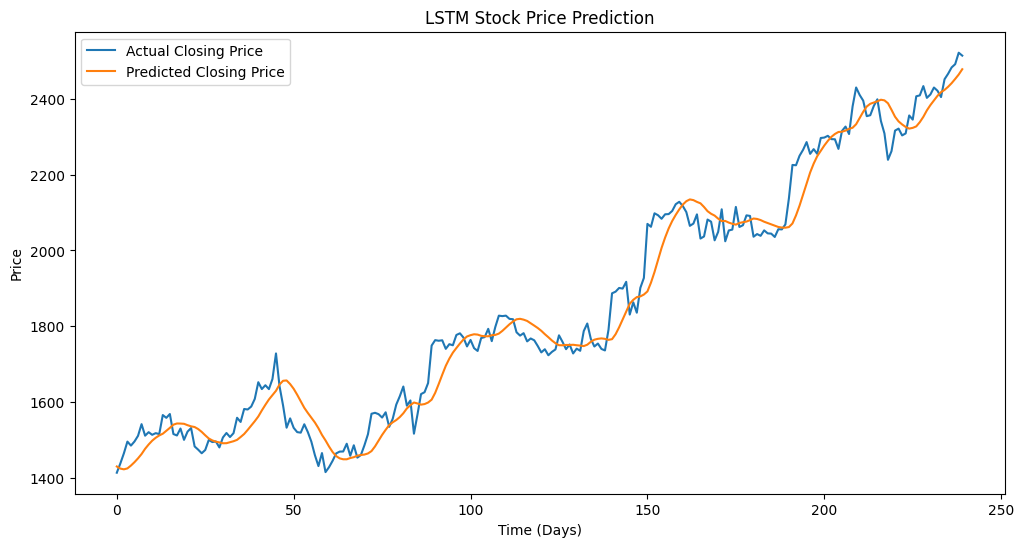

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Closing Price')
plt.plot(predictions, label='Predicted Closing Price')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Price')
plt.legend()
plt.show()